### The Dense-Face Text-editing Model Output

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import torch
from PIL import Image

In [4]:
from diffusers import StableDiffusionPipeline
model_base_path = "../ckpt/DenseFace_text_editing.safetensors"
pipe = StableDiffusionPipeline.from_single_file(model_base_path, requires_safety_checker=False)
pipe.to("cuda")

In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.3",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
# gloal variable and function
def image_grid(imgs, rows, cols, size_after_resize, out_dir="output_main_figure", prompt_idx=0):
    assert len(imgs) == rows*cols
    
    os.makedirs(out_dir, exist_ok=True)
    for _ in range(len(imgs)):
        imgs[_].save(f"{out_dir}/prompt_{prompt_idx}_{_}.png")

    w, h = size_after_resize, size_after_resize

    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        img = img.resize((w,h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


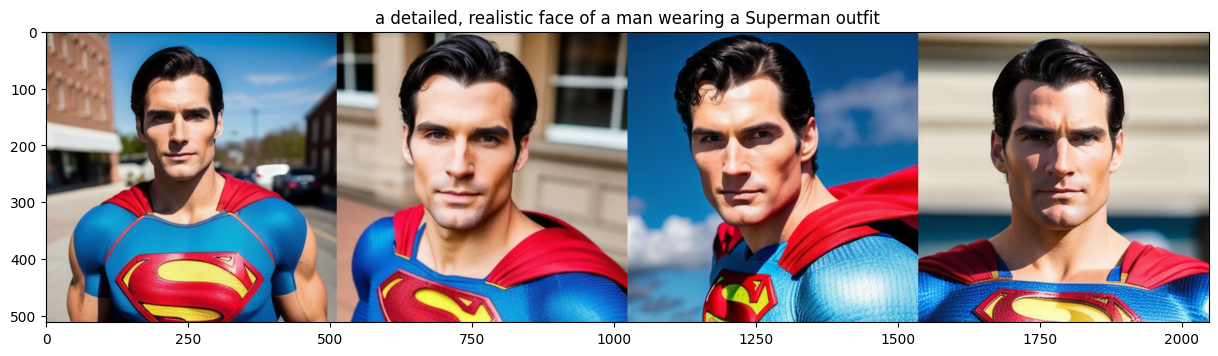

In [6]:
%matplotlib inline
from matplotlib import pyplot
from matplotlib import pyplot as plt

prompt = "a detailed, realistic face of a man wearing a Superman outfit"
negative_prompt = "(asymmetry, worst quality, low quality, illustration, 3d, 2d, painting, cartoons, sketch), open mouth, grayscale"
pipe.safety_checker = None
images = pipe(prompt=prompt, negative_prompt=negative_prompt, num_images_per_prompt=4, num_inference_steps=50).images
grid = image_grid(images, 1, 4, size_after_resize=512, prompt_idx=0, out_dir="../output_stage_1")
plt.figure(figsize=(15, 15))
plt.subplot(1,1,1) 
plt.title(prompt)     
plt.imshow(grid)
plt.show()